In [6]:
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 1: Data Collection 

 Historical adjusted closing price data is gathered for two ETFs, SPY and TLT, using Yahoo Finance (yfinance).

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf

tickers = ['SPY', 'TLT']
data = yf.download(tickers, start='2010-01-01')['Adj Close']


[*********************100%***********************]  2 of 2 completed


Step 2:  Normalization of Prices
To compare the price performance of both ETFs on the same scale, normalization of the prices such that the starting price for both ETFs is set to 100. This makes it easier to see their relative performance over time, irrespective of their initial price levels.

In [8]:
# Normalize starting price to $100
data_normalized = data / data.iloc[0] * 100

Step 3: Plotting the ETF Price Performance
Plotting to visualize the normalized prices of the two ETFs, with markers indicating the points where the maximum and minimum prices occurred.

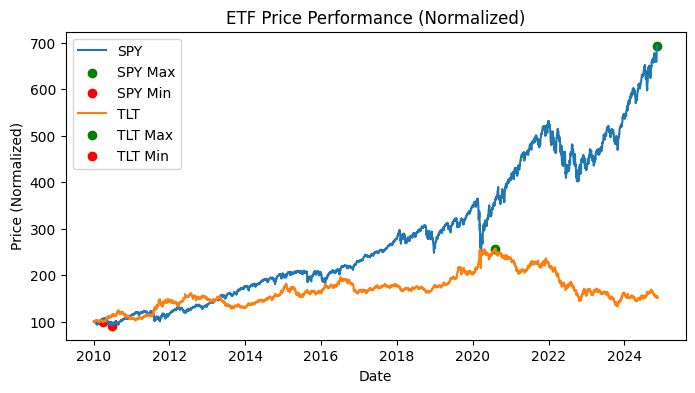

In [9]:
import matplotlib.pyplot as plt

# Plotting the ETFs with markers for max and min points
plt.figure(figsize=(8, 4))
for ticker in tickers:
    plt.plot(data_normalized[ticker], label=ticker)
    plt.scatter(data_normalized[ticker].idxmax(), data_normalized[ticker].max(), color='green', marker='o', label=f'{ticker} Max')
    plt.scatter(data_normalized[ticker].idxmin(), data_normalized[ticker].min(), color='red', marker='o', label=f'{ticker} Min')

plt.title('ETF Price Performance (Normalized)')
plt.xlabel('Date')
plt.ylabel('Price (Normalized)')
plt.legend()
plt.show()

Step 4: Portfolio Optimization
This section of the aims to optimize a portfolio consisting of the two ETFs, with the goal of maximizing the Sharpe ratio. The Sharpe ratio is a measure of risk-adjusted return.

In [10]:
from scipy.optimize import minimize

# Portfolio Optimization
returns = data.pct_change().dropna()

# Function to calculate portfolio return and risk
def portfolio_performance(weights):
    portfolio_return = np.dot(weights, returns.mean()) * 252
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return portfolio_risk, portfolio_return

# Objective function: Maximize Sharpe ratio
def negative_sharpe_ratio(weights):
    risk, return_ = portfolio_performance(weights)
    return -return_ / risk

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Optimization
initial_weights = [0.5, 0.5]
optimized = minimize(negative_sharpe_ratio, initial_weights, bounds=bounds, constraints=constraints)
optimal_weights = optimized.x

print("Optimal Weights:", dict(zip(tickers, optimal_weights)))


Optimal Weights: {'SPY': 0.6091096151327688, 'TLT': 0.39089038486723116}


C:\Users\MONALISA MBILINYI\AppData\Local\Temp\ipykernel_34180\3212731155.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()
